Author: Natasha Glover;
Date: 25 Nov 2019

This notebook compares 3 subtypes of orthologs obtained from the OMA browser (Jun 2019 version) for the rat P53 gene. The sub-types of orthologs compared are:
- pairwise orthologs
- HOG-derived orthologs
- OMA Group-derived orthologs

The method requires using the OMA REST API, but I also show how to obtain the same results with the browser.

For more information on the subtypes of orthologs provided in OMA, and more information describing this particular example, see **OMA: A Primer**. 

# Setup

In [1]:
#for rest api
import requests
import json

api_url = "https://omabrowser.org/api/"

#for venn diagram
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

#for analysis
import pandas as pd


/Users/nglover/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#set up your working directory for this analysis
working_directory =  '/Users/nglover/DataAnalysis/ortholog_comparison/'

In [3]:
#the gene of interest, in this case for the rat p53
gene_of_interest_omaId = "RATNO03710"

# Pairwise orthologs

In this analysis we want compare the number of orthologs for a given gene, determined by several methods of inference. First we get the pairs of orthologs, determined by the normal OMA inference pipeline. First, I show how to obtain them from the OMA API, then I show how to obtain them from the omabrowser.

In [4]:
#obtain pairwise orthologs from the API

pairwise_orthologs = requests.get(api_url+"/protein/"+ gene_of_interest_omaId +"/orthologs/").json()
pairwise_orthologs = [x['omaid'] for x in pairwise_orthologs]

print("There are {} pairwise orthologs for {}.".format(len(pairwise_orthologs), gene_of_interest_omaId), "\n")
print("These are the orthologs:\n{}".format(pairwise_orthologs))

There are 40 pairwise orthologs for RATNO03710. 

These are the orthologs:
['BRAFL04526', 'LEPOC07666', 'ANATE33593', 'SERDU24530', 'SCOMX20624', 'GASAC12863', 'GASAC18178', 'TAKRU14704', 'TETNG08947', 'ORYLA07425', 'ORYME20960', 'NOTFU06675', 'CYPVA10916', 'POEFO05791', 'XIPMA11214', 'ORENI19118', 'AMPOC08229', 'HIPCM00634', 'ASTMX10477', 'ASTMX20223', 'PYGNA20446', 'ICTPU23515', 'DANRE33875', 'LATCH10910', 'MOUSE04050', 'TUPBE00446', 'SARHA15516', 'PHACI25211', 'CHRPI27412', 'PELSI05784', 'SPHPU23875', 'XENTR12242', 'CIOIN05889', 'CIOSA13478', 'IXOSC09422', 'DAPPU06159', 'LEPSM05743', 'NASVI15815', 'PEDHC00225', 'OCTBM07059']


In [5]:
#alternatively, one can download the file from website https://omabrowser.org/oma/vps/RATNO03710/
pairwise_orthologs_file = pd.read_csv(working_directory +'tableExport.txt', sep=",")
pairwise_orthologs = pairwise_orthologs_file[pairwise_orthologs_file['Relation']!="close paralog"]['Protein ID'] #filter out paralogs
pairwise_orthologs = pairwise_orthologs.tolist()

print("There are {} pairwise orthologs for {}.".format(len(pairwise_orthologs), gene_of_interest_omaId), "\n")
print("These are the orthologs:\n{}".format(pairwise_orthologs))

There are 40 pairwise orthologs for RATNO03710. 

These are the orthologs:
['BRAFL04526', 'LEPOC07666', 'ORYLA07425', 'PYGNA20446', 'LATCH10910', 'MOUSE04050', 'TUPBE00446', 'PHACI25211', 'CHRPI27412', 'PELSI05784', 'CIOIN05889', 'CIOSA13478', 'DAPPU06159', 'LEPSM05743', 'NASVI15815', 'PEDHC00225', 'OCTBM07059', 'ASTMX10477', 'ASTMX20223', 'ANATE33593', 'SERDU24530', 'SCOMX20624', 'TAKRU14704', 'TETNG08947', 'ORYME20960', 'NOTFU06675', 'CYPVA10916', 'POEFO05791', 'XIPMA11214', 'ORENI19118', 'AMPOC08229', 'HIPCM00634', 'ICTPU23515', 'DANRE33875', 'SARHA15516', 'SPHPU23875', 'XENTR12242', 'IXOSC09422', 'GASAC12863', 'GASAC18178']


# HOG-derived orthologs

Now, get the orthologs obtained from the HOG which contains p53. It is important to remember that HOGs contain both orthologs and paralogs, so we need to filter out the paralogs. We will do this with the OMA REST API, which has a function called hog_derived_orthologs that induces pairs of orthologs from a hog containing a gene of interest.

In [6]:
#Get the pairs of orthologs from the HOG, using thte OMA API

hog_derived_orthologs = requests.get(api_url+"/protein/"+ gene_of_interest_omaId +"/hog_derived_orthologs/").json()
hog_derived_orthologs = [x['omaid'] for x in hog_derived_orthologs]

print("There are {} hog-derived orthologs for {}.".format(len(hog_derived_orthologs), gene_of_interest_omaId), "\n")
print("These are the orthologs:\n{}".format(hog_derived_orthologs))


There are 74 hog-derived orthologs for RATNO03710. 

These are the orthologs:
['BRAFL04526', 'LEPOC07666', 'ANATE33593', 'SERDU24530', 'SCOMX20624', 'GASAC18178', 'TAKRU14704', 'TETNG08947', 'ORYLA07425', 'ORYME20960', 'NOTFU06675', 'CYPVA10916', 'POEFO05791', 'XIPMA11214', 'ORENI19118', 'AMPOC08229', 'HIPCM00634', 'ASTMX10477', 'ASTMX20223', 'PYGNA20446', 'PYGNA35958', 'ICTPU23515', 'ICTPU32586', 'DANRE33875', 'LATCH10910', 'MOUSE04050', 'CERAT16919', 'CHLSB05212', 'MACFA12932', 'MACMU09315', 'MACNE32052', 'MANLE14753', 'PAPAN07289', 'COLAP23501', 'RHIBE10478', 'RHIRO28452', 'GORGO08436', 'HUMAN11953', 'PANPA16288', 'PANTR13505', 'PONAB05442', 'NOMLE13163', 'AOTNA15067', 'AOTNA17725', 'AOTNA32936', 'CALJA16436', 'SAIBB15416', 'MICMU08633', 'PROCO25562', 'OTOGA10899', 'TUPBE00446', 'CANLF15465', 'VULVU18753', 'MUSPF10133', 'AILME07424', 'URSAM24678', 'URSMA20986', 'FELCA14704', 'TURTR13573', 'BOVIN07692', 'SHEEP02763', 'PIGXX03337', 'PTEVA15489', 'MYOLU14260', 'MYOLU18349', 'ERIEU13442

# OMA Group-derived orthologs

Now to obtain orthologs of rat p53 derived from its OMA Group.

In [7]:
#obtain pairwise orthologs from the API

omagroup_orthologs = requests.get(api_url+"/group/"+ gene_of_interest_omaId + "/" ).json()['members']
omagroup_orthologs = [x['omaid'] for x in omagroup_orthologs]

#remove query gene
omagroup_orthologs = [x for x in omagroup_orthologs if x!=gene_of_interest_omaId]

print("There are {} oma group-derived orthologs for {}.".format(len(omagroup_orthologs), gene_of_interest_omaId), "\n")
print("These are the orthologs:\n{}".format(omagroup_orthologs))

There are 13 oma group-derived orthologs for RATNO03710. 

These are the orthologs:
['NOTFU06675', 'CYPVA10916', 'POEFO05791', 'XIPMA11214', 'HIPCM00634', 'ASTMX10477', 'PYGNA20446', 'ICTPU32586', 'LOXAF00244', 'PHACI25211', 'CIOIN05889', 'CIOSA13478', 'DANPL15091']


In [8]:
#get the oma-group orthologs from the browser, downloaded file from https://omabrowser.org/oma/group/RATNO03710/
oma_groups_file = pd.read_csv(working_directory +'tableExport_omagroup.txt', sep=",")
omagroup_orthologs = oma_groups_file['Protein ID'].tolist()

#remove query gene
omagroup_orthologs = [x for x in omagroup_orthologs if x!=gene_of_interest_omaId]

print("There are {} oma group-derived orthologs for {}.".format(len(omagroup_orthologs), gene_of_interest_omaId), "\n")
print("These are the orthologs:\n{}".format(omagroup_orthologs))

There are 13 oma group-derived orthologs for RATNO03710. 

These are the orthologs:
['NOTFU06675', 'CYPVA10916', 'POEFO05791', 'XIPMA11214', 'HIPCM00634', 'ASTMX10477', 'PYGNA20446', 'ICTPU32586', 'LOXAF00244', 'PHACI25211', 'CIOIN05889', 'CIOSA13478', 'DANPL15091']


# Comparison

Text(0.5,1,'Rat P53 Orthologs Comparison')

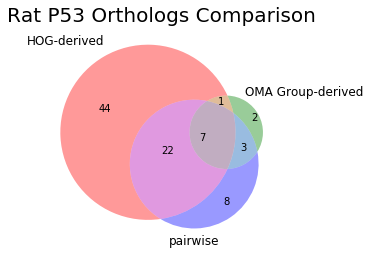

In [9]:
fig, ax = plt.subplots()
out = venn3([set(hog_derived_orthologs), set(omagroup_orthologs), set(pairwise_orthologs)],\
      set_labels = ("HOG-derived", "OMA Group-derived", "pairwise"))
plt.title("Rat P53 Orthologs Comparison", fontsize=20)